<a href="https://colab.research.google.com/github/ameliavasiliu/knn/blob/main/05_Visualization%26kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q0

1. What is the difference between regression and classification?

These are both supervised learning types, but they differ in one key way: regression is used for a continuous numerical value, and classification is used to describe a discrete category or class.

2. What is a confusion table? What does it help us understand about a model's performance?

It is a table that is used to evaluate the performance of a model, and it shows the actual vs predictive values side by side for comparison. It helps us understand how well the model is performing by looking at correct and incorrect classifications.

3. What does the SSE quantify about a particular model?

SSE is the sum of squared differences between the observed values and the predicted values. The Sum of Squared Errors quantifies how well a model fits a particular data set. The smaller the SSE the better the model fits, and the larger the SSE the worse the model fits.

4. What are overfitting and underfitting?

Overfitting occurs when the model is too complex and conforms to the training data too much, not making it versatile enough for new or unseen data. Underfitting occurs when the model is too cimple and doesn't capture the underlying patterns in the dataset.

5. Why does splitting the data into training and testing sets, and choosing
 by evaluating accuracy or SSE on the test set, improve model performance?

These practices help to avoid over and underfitting of data, as well as making sure the model correctly conforms to the data the intended way.

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

A class label is where the model predicts one specific class as the outcome, based on which class has the highest probability. It is simplistic and gives a clear and easily comprehended answer: in the class or not in the class. However, there is no insight to the uncertainty of the model or the confidence level in which the data was classified. To illustrate, if a model predicts alass "A" with 51% confidence and class B with 49%, it is unclear how reliable that prediction is. A probability distribution gives us the probability for each possible class. This can prove useful, as we get a better understanding of how confident the model is about its prediction. However, this can be more difficult to interpret if there are many classes; if there are a lot of classes the probability could be distributed somewhat evenly.



# Q6

1. Load the airbnb_hw.csv data with Pandas. We're only going to use Review Scores Rating, Price, and Beds, so use .loc to reduce the dataframe to those variables.

In [196]:
import pandas as pd

In [197]:
data = pd.read_csv('airbnb_hw.csv')
df_reduced = data.loc[:, ['Review Scores Rating', 'Price', 'Beds']]

2. Set use .isnull() to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.

In [198]:
df_missing= df_reduced[df_reduced['Review Scores Rating'].isnull()]
df_missing.head()

,Review Scores Rating,Price,Beds
0,NaN,145,1.0
1,NaN,37,1.0
2,NaN,28,1.0
3,NaN,199,3.0
13,NaN,68,1.0


3. Use df = df.dropna(axis = 0, how = 'any') to eliminate any observations with missing values/NA's from the dataframe.

In [199]:
df_clean = df_reduced.dropna(axis=0, how='any')
df_clean

,Review Scores Rating,Price,Beds
4,96.0,549,3.0
5,100.0,149,1.0
6,100.0,250,1.0
7,94.0,90,1.0
8,90.0,270,2.0
...,...,...,...
30332,100.0,90,1.0
30347,80.0,65,1.0
30378,100.0,55,1.0
30404,100.0,60,1.0


In [201]:
df_clean['Price'] = df_clean['Price'].replace({r'[^\d.]': ''}, regex=True)
df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')

<ipython-input-201-87042fb151ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Price'] = df_clean['Price'].replace({r'[^\d.]': ''}, regex=True)
<ipython-input-201-87042fb151ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')


4. For the complete cases, create a k-NN model that uses the variables Price and Beds to predict Review Scores Rating. How do you choose
? (Hint: Train/test split, iterate over reasonable values of
 and find a value that minimizes SSE on the test split using predictions from the training set.)

In [202]:
df_clean['Price'].isnull().any()

False

In [203]:
df_clean.isna().sum()

,0
Review Scores Rating,0
Price,0
Beds,0


In [204]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [205]:
X = df_clean[['Price', 'Beds']]
y = df_clean['Review Scores Rating']

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

In [207]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [208]:
sse_values = []
k_values = range(1, 21)

In [209]:
np.isnan(X_train_scaled).any()

False

In [211]:
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    sse = np.sum((y_test - y_pred) ** 2)
    sse_values.append(sse)

# finding k that minimizes SSE
optimal_k = k_values[np.argmin(sse_values)]
print(f"The optimal value of k is: {optimal_k}")

# training with optimal k
final_model = KNeighborsRegressor(n_neighbors=optimal_k)
final_model.fit(X_train_scaled, y_train)

y_final_pred = final_model.predict(X_test_scaled)
final_sse = np.sum((y_test - y_final_pred) ** 2)
final_sse

The optimal value of k is: 20


365947.125

5. Predict the missing ratings.

In [212]:
df_reduced['Price'] = df_reduced['Price'].replace({r'[^\d.]': ''}, regex=True)
df_reduced['Price'] = pd.to_numeric(df_reduced['Price'], errors='coerce')

In [219]:
# cleaning df
df_reduced['Price'] = df_reduced['Price'].replace({r'[^\d.]': ''}, regex=True)
df_reduced['Price'] = pd.to_numeric(df_reduced['Price'], errors='coerce')

# identifying Nan
missing_reviews_df = df_reduced[df_reduced['Review Scores Rating'].isnull()]

imputer = SimpleImputer(strategy='mean')
missing_reviews_imputed = imputer.fit_transform(missing_reviews_df[['Price', 'Beds']])

# scaling
missing_reviews_scaled = scaler.transform(missing_reviews_imputed)

# predicting missing values using model
predicted_ratings = final_model.predict(missing_reviews_scaled)

# string the predicted ratings
missing_reviews_df['Predicted Review Scores Rating'] = predicted_ratings

print(missing_reviews_df[['Price', 'Beds', 'Predicted Review Scores Rating']])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


       Price  Beds  Predicted Review Scores Rating
0        145   1.0                           94.05
1         37   1.0                           90.50
2         28   1.0                           81.45
3        199   3.0                           89.25
13        68   1.0                           87.90
...      ...   ...                             ...
30473    300   5.0                           88.55
30474    125   2.0                           92.05
30475     80   1.0                           94.20
30476     35   1.0                           87.60
30477     80   1.0                           94.20

[8323 rows x 3 columns]


<ipython-input-219-8363c5e821ef>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_reviews_df['Predicted Review Scores Rating'] = predicted_ratings


6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.

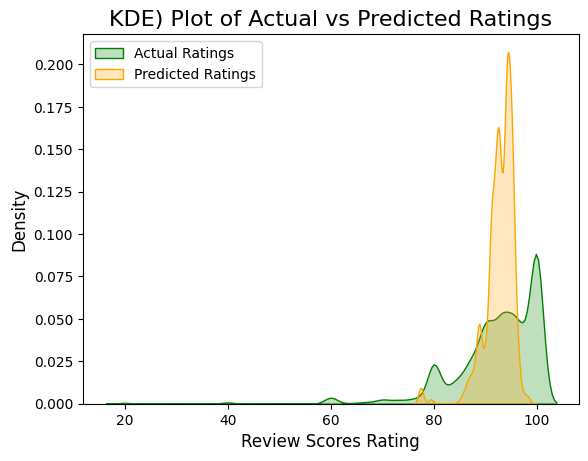

In [222]:
sns.kdeplot(y_train, label='Actual Ratings', color='green', fill=True)
sns.kdeplot(predicted_ratings, label='Predicted Ratings', color='orange', fill=True)
plt.title('KDE) Plot of Actual vs Predicted Ratings', fontsize=16)
plt.xlabel('Review Scores Rating', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

An explanation for why the actual vs predicted reviews are so different could be because the relationship between the features and the target variable (ratings) is distorted. The training and set may have had high correlatuons but the test set could not have had the same results.

# Q1

1. Load the ./data/college_completion.csv data with Pandas.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("college_completion.csv")

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.

In [ ]:
df.shape[0] # number of rows

3798

In [ ]:
df.shape[1] # number of columns

63

The dimensions are 3798 rows × 63 columns, which means there are 3797 observations.

In [ ]:
df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


3. Cross tabulate control and level. Describe the patterns you see.

In [ ]:
pd.crosstab(df['control'], df['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


Some patterns that stick out to me are that there is a heavy concentration of private non-profits at the 4-year level and a generally more even distribution between levels for private for profit and public.

4. For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

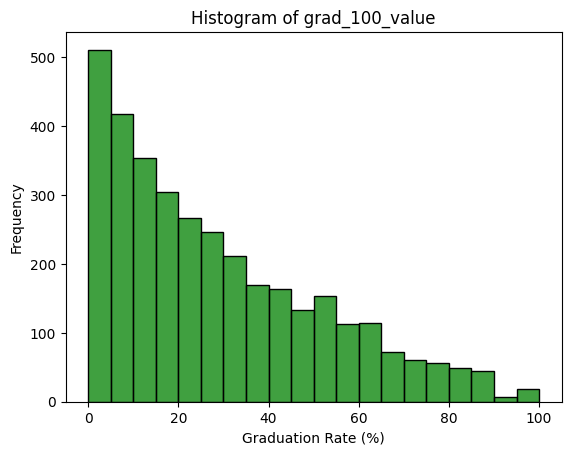

In [ ]:
sns.histplot(df['grad_100_value'], kde=False, color='green', bins=20)
plt.title('Histogram of grad_100_value')
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-30-fa043aef805d>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['grad_100_value'], shade=True, color='purple')


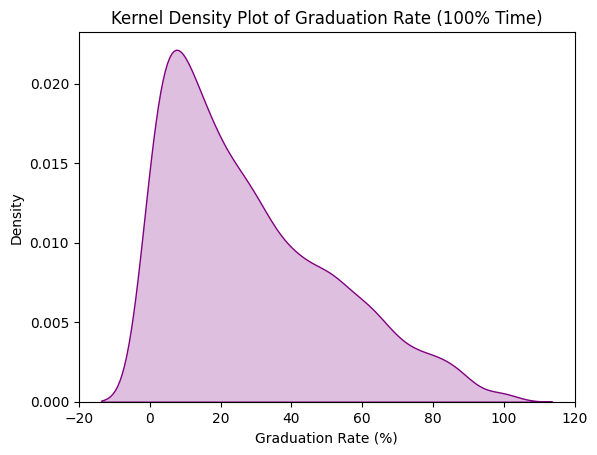

In [ ]:
sns.kdeplot(df['grad_100_value'], shade=True, color='purple')
plt.title('Kernel Density Plot of Graduation Rate (100% Time)')
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Density')
plt.show()

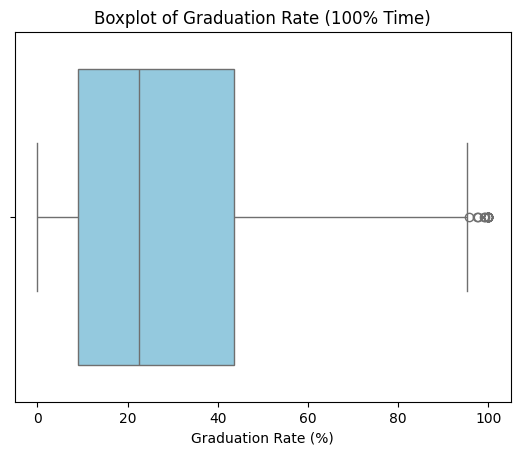

In [ ]:
sns.boxplot(x=df['grad_100_value'], color='skyblue')
plt.title('Boxplot of Graduation Rate (100% Time)')
plt.xlabel('Graduation Rate (%)')
plt.show()

In [ ]:
df['grad_100_value'].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


5. For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see. Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control. Which institutions appear to have the best graduation rates?

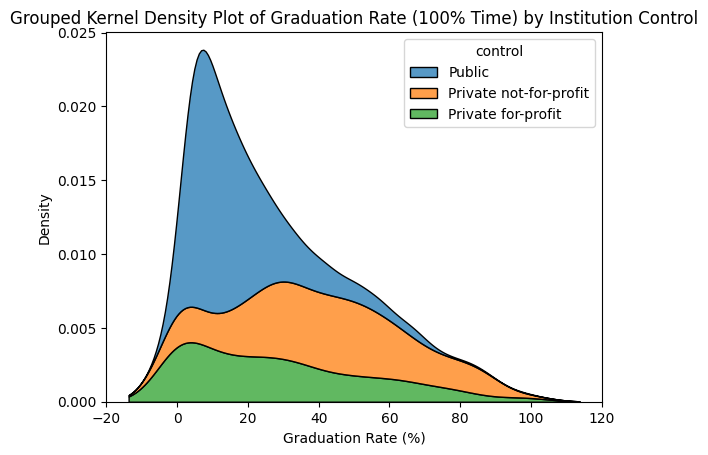

In [ ]:
sns.kdeplot(data=df, x='grad_100_value', hue='control', multiple='stack')
plt.title('Grouped Kernel Density Plot of Graduation Rate (100% Time) by Institution Control')
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Density')
plt.show()

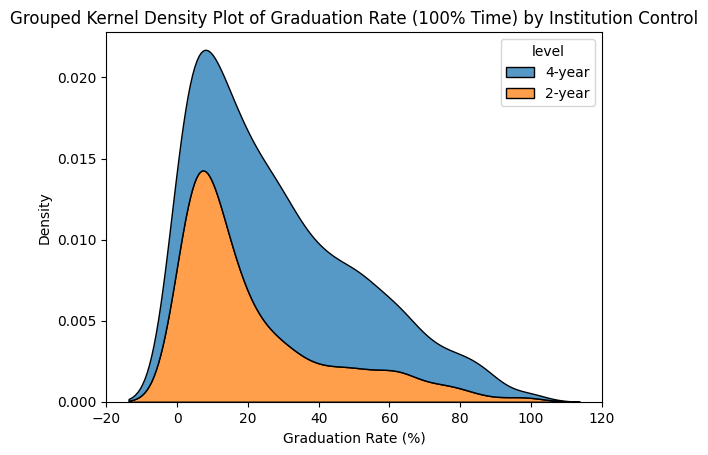

In [ ]:
sns.kdeplot(data=df, x='grad_100_value', hue='level', multiple='stack')
plt.title('Grouped Kernel Density Plot of Graduation Rate (100% Time) by Institution Control')
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Density')
plt.show()

In [ ]:
# grouped by control
df.groupby('control')['grad_100_value'].describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


In [ ]:
# grouped by control
df.groupby('level')['grad_100_value'].describe()

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
2-year,1455.0,21.636151,21.645747,0.0,6.0,13.0,30.600,100.0
4-year,2012.0,33.230119,23.270160,0.0,15.2,29.7,49.225,100.0


Using the density plot and statistical analyses created above, we can observe that 4-year level institutions generally have a higher graduation rate than 2-year institutions. Additionally, private non-profit institutions have the some of highest gratduation rates along with public schools out of the different control categories.

6. Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

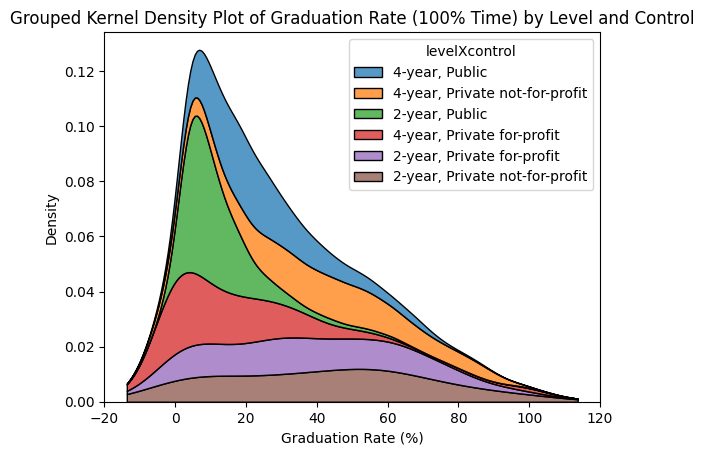

In [ ]:
df['levelXcontrol']=df['level']+', '+df['control']
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', multiple='stack', common_norm=False, fill=True)
plt.title('Grouped Kernel Density Plot of Graduation Rate (100% Time) by Level and Control')
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Density')
plt.show()

The institutions with the highest graduation rate appear to be 4-year public and 4-year private non-profit schools.

7. Make a kernel density plot of aid_value. Now group your graph by level and control. What explains the shape of the graph? Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.

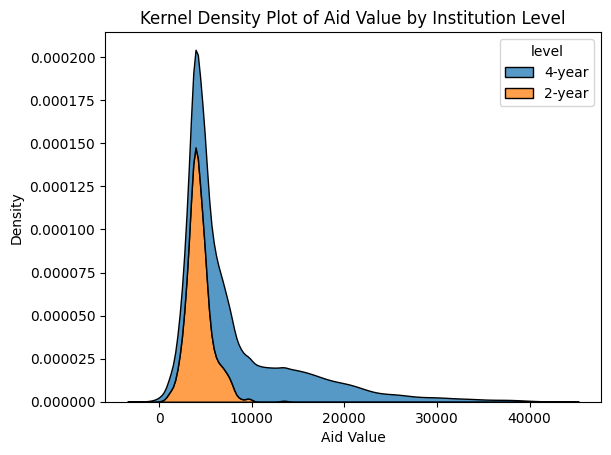

In [ ]:
sns.kdeplot(data=df, x='aid_value', hue='level', multiple='stack')
plt.title('Kernel Density Plot of Aid Value by Institution Level')
plt.xlabel('Aid Value')
plt.ylabel('Density')
plt.show()

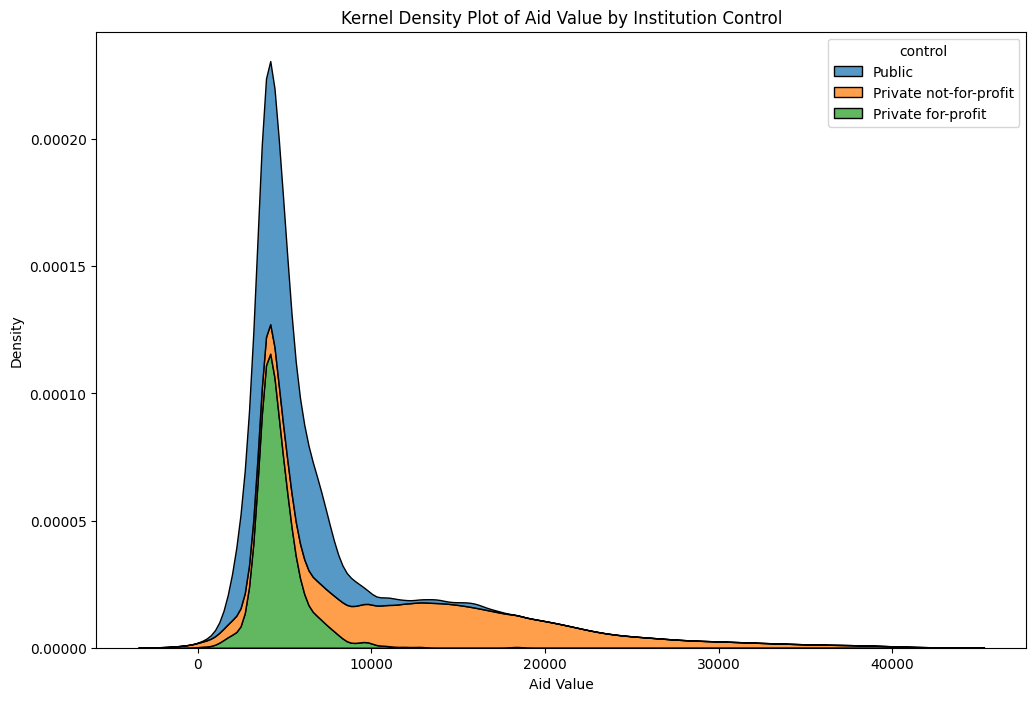

In [ ]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='aid_value', hue='control', multiple='stack')
plt.title('Kernel Density Plot of Aid Value by Institution Control')
plt.xlabel('Aid Value')
plt.ylabel('Density')
plt.show()

The shape of these graphs tells us that there is a high concentration of aid between 0 and 1000, and the range is very wide. The majority of Aid falls between 0 and 1000.

In [ ]:
# by aid value
df.groupby('control')['aid_value'].describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,991.0,4632.206862,1399.121259,294.0,3861.50,4331.0,5131.5,18355.0
Private not-for-profit,1248.0,14180.722756,7772.700998,902.0,8325.00,13322.0,18571.0,41580.0
Public,1558.0,5094.835687,2136.436370,881.0,3725.25,4667.0,6087.5,17299.0


In [ ]:
# by control
df.groupby('level')['aid_value'].describe()

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
2-year,1458.0,4310.878601,1384.045631,294.0,3485.5,4113.0,4890.0,13654.0
4-year,2339.0,10235.379222,7227.369167,902.0,4830.5,7222.0,14046.0,41580.0


8. Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

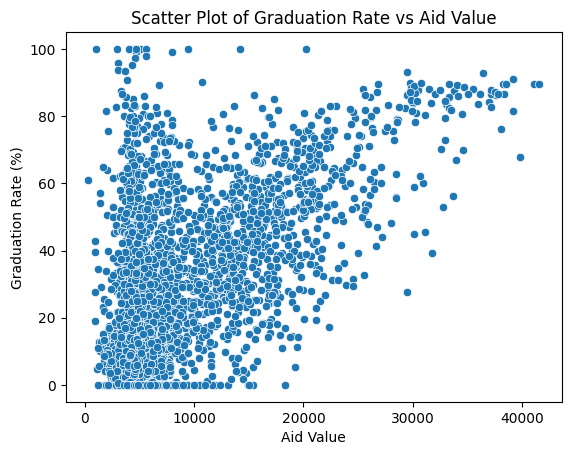

In [ ]:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value')
plt.title('Scatter Plot of Graduation Rate vs Aid Value')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (%)')
plt.show()

We can see a somewhat linear trend: aid value appears to increase as graduation rate increases.

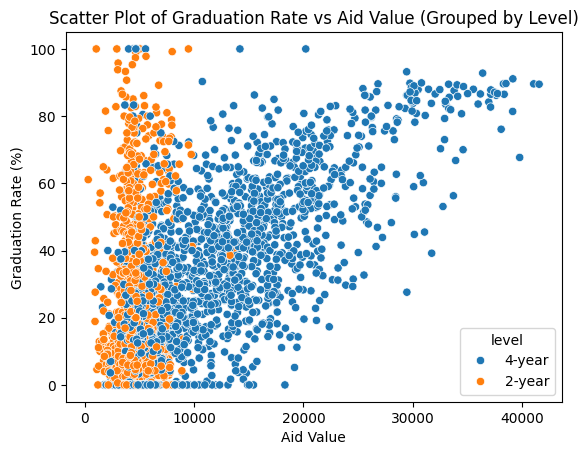

In [ ]:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='level')
plt.title('Scatter Plot of Graduation Rate vs Aid Value (Grouped by Level)')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (%)')
plt.show()

Here we can see that 4-year institutions give higher amounts of aid value than 2-year institutions - this is a very clear pattern.

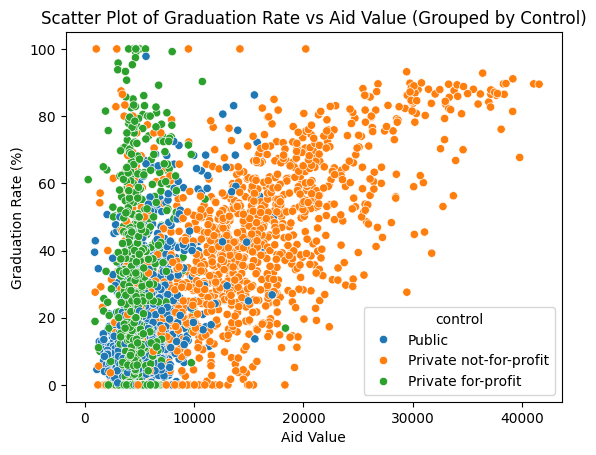

In [ ]:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='control')
plt.title('Scatter Plot of Graduation Rate vs Aid Value (Grouped by Control)')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (%)')
plt.show()

We can see that private for-profit institutions and public institutions do not give as much aid as private non-profit institutions. Aid appears to increase graduation rates for private non-profit 4-year institutions.